<h1 style="font-size: 30px; color:brown;text-align: center;
           "> PREDICTING CO2 EMISSION BY VEHICLES IN CANADA

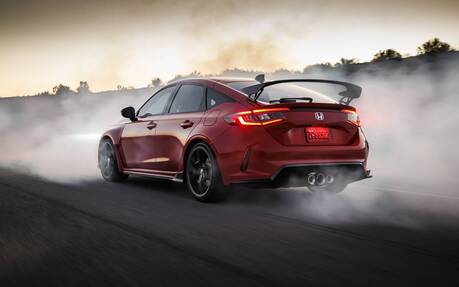

##### Dataset Link
https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
import klib as k
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
df = pd.read_csv('./CO2 Emissions_Canada.csv')
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
df.shape

(7385, 12)

In [5]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


##### Checking null values

In [6]:
df.isnull().mean()*100

Make                                0.0
Model                               0.0
Vehicle Class                       0.0
Engine Size(L)                      0.0
Cylinders                           0.0
Transmission                        0.0
Fuel Type                           0.0
Fuel Consumption City (L/100 km)    0.0
Fuel Consumption Hwy (L/100 km)     0.0
Fuel Consumption Comb (L/100 km)    0.0
Fuel Consumption Comb (mpg)         0.0
CO2 Emissions(g/km)                 0.0
dtype: float64

##### Checking and dropping duplicated values

In [7]:
df.duplicated().sum()

1103

In [8]:
df = df.drop_duplicates()
df.duplicated().sum()

0

##### Univariate Analysis

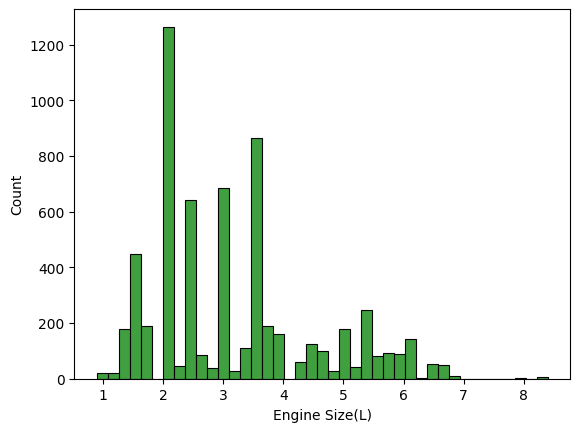

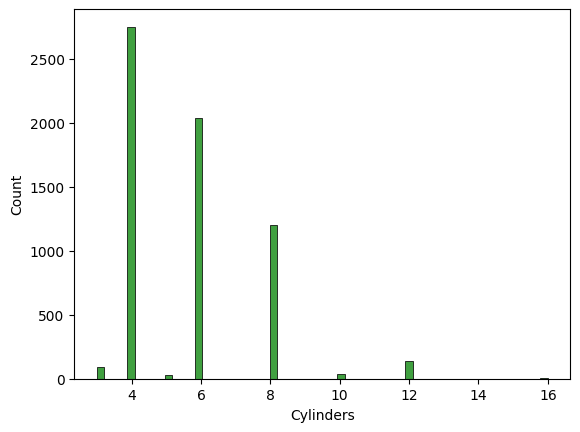

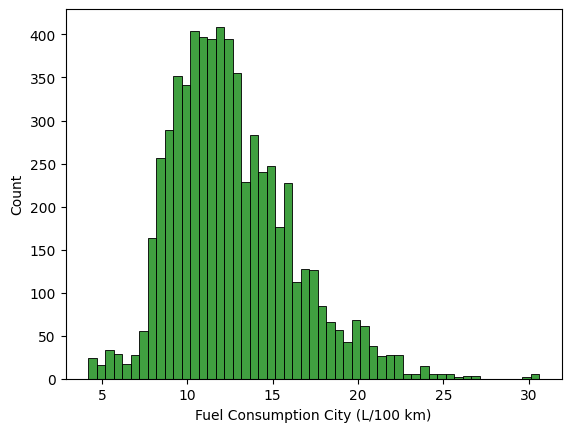

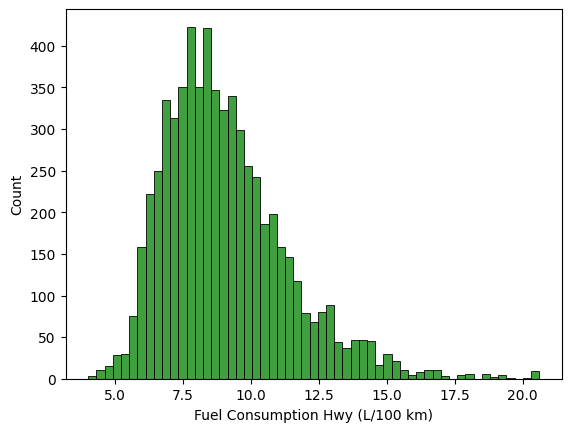

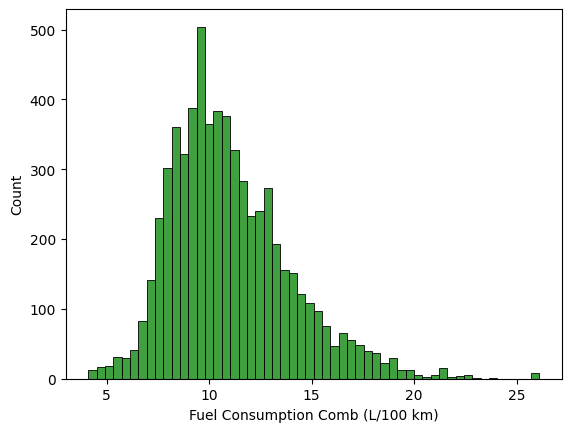

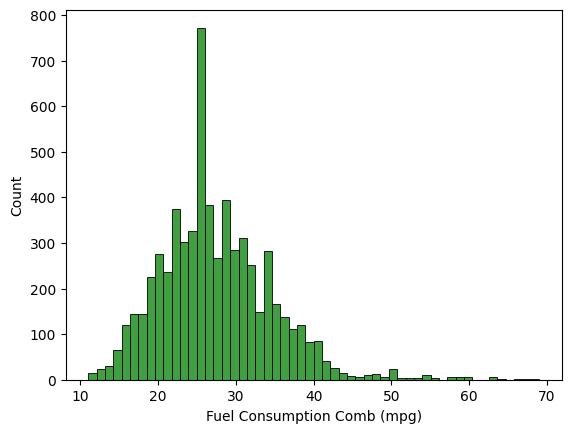

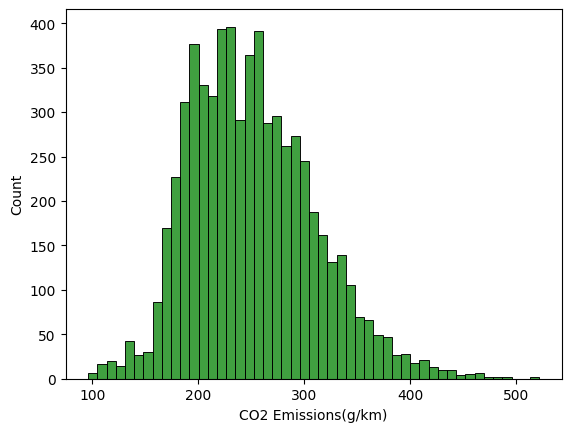

In [9]:
for i in df.columns:
    if df[i].dtypes != "object":
        sns.histplot(x=df[i],color='green')
        plt.show()

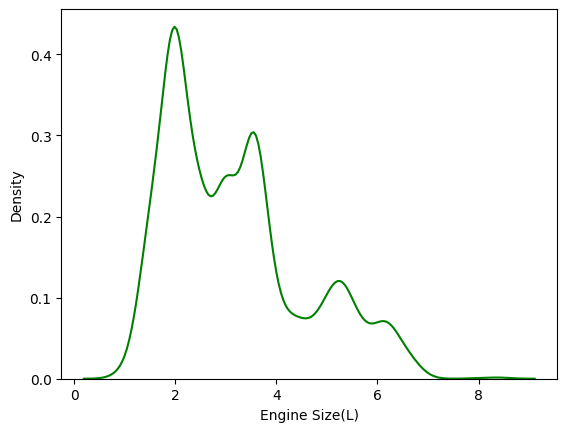

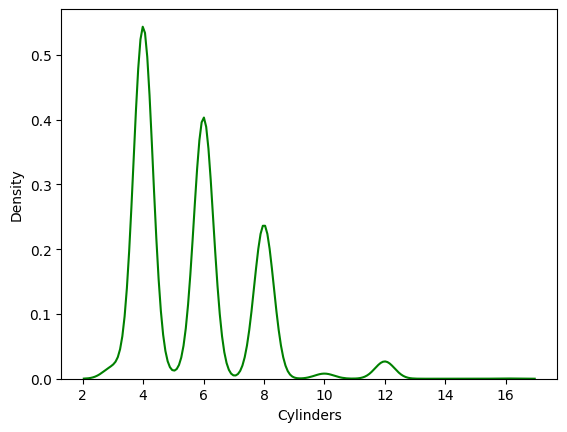

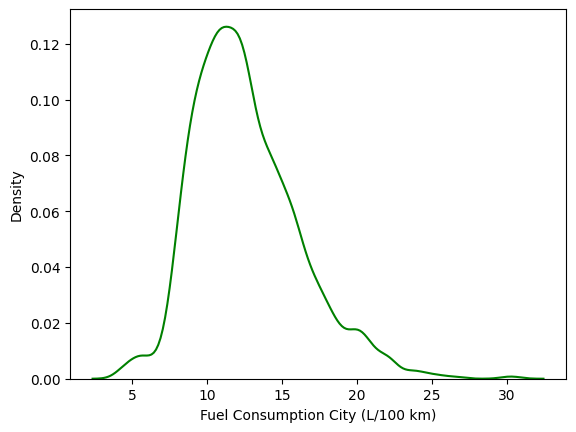

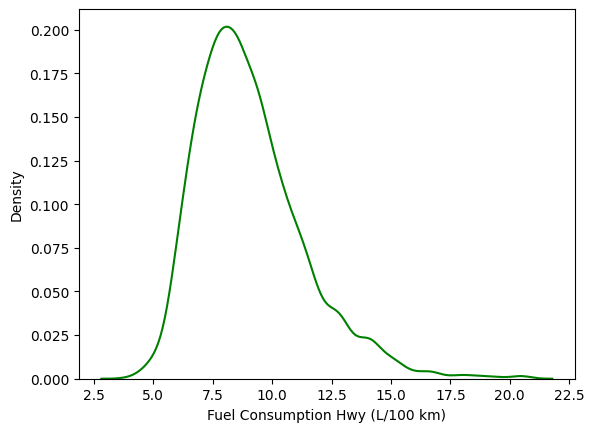

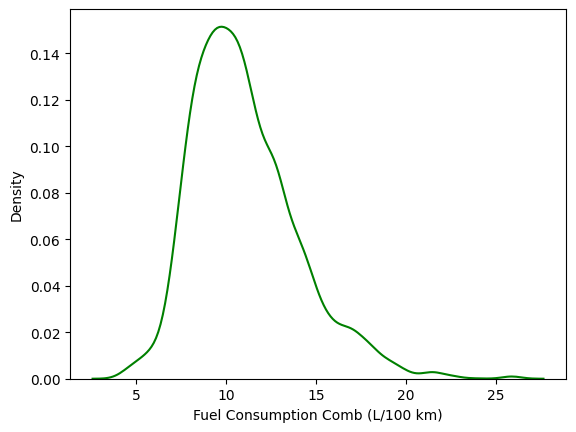

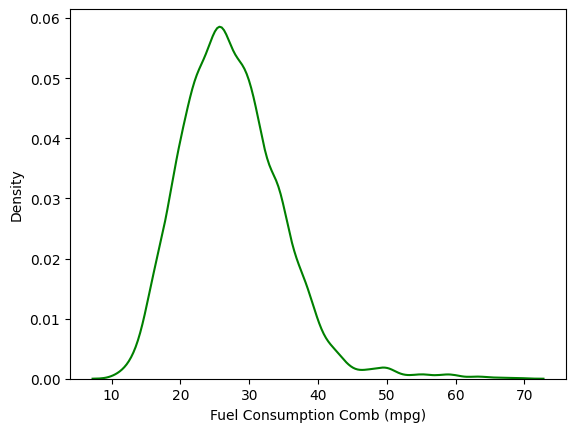

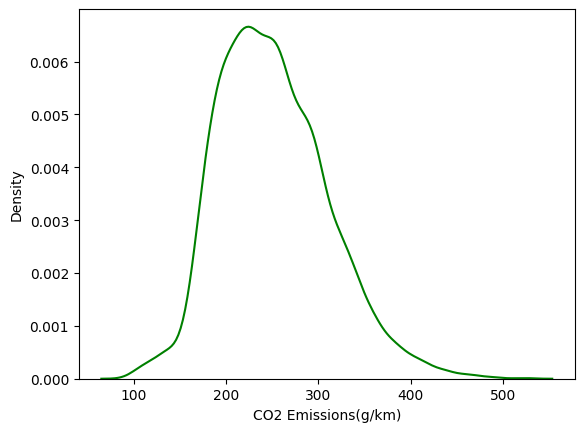

In [10]:
for i in df.columns:
    if df[i].dtypes != "object":
        sns.kdeplot(x=df[i],color='green')
        plt.show()

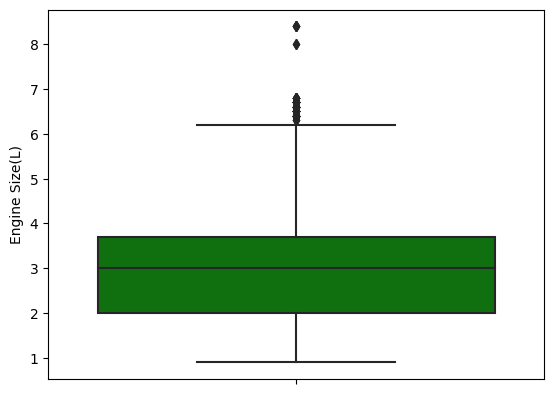

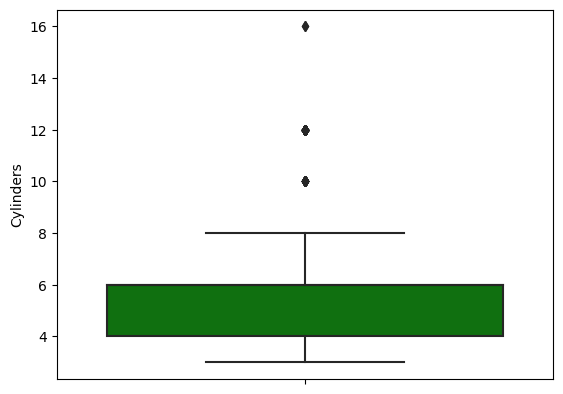

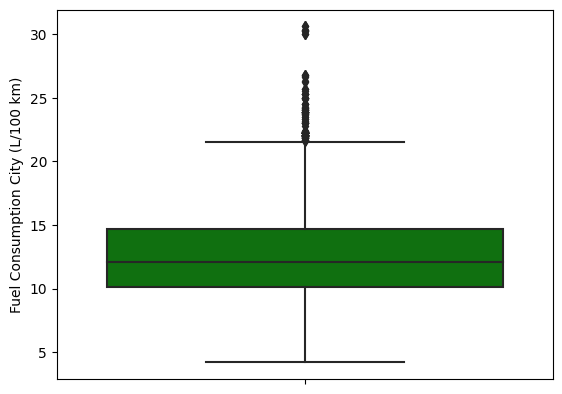

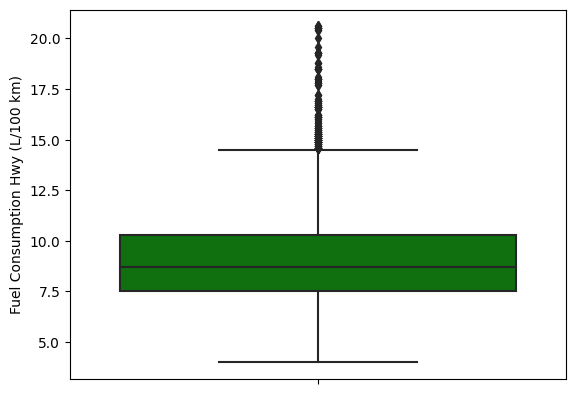

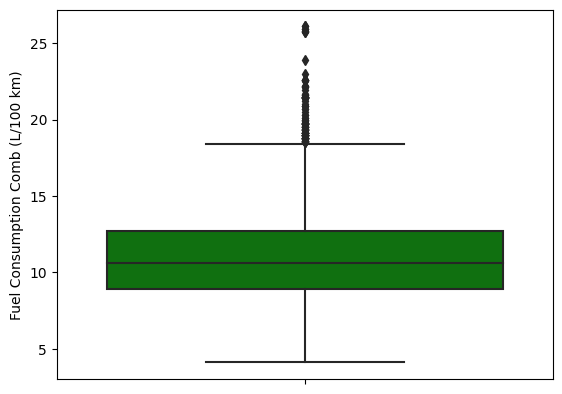

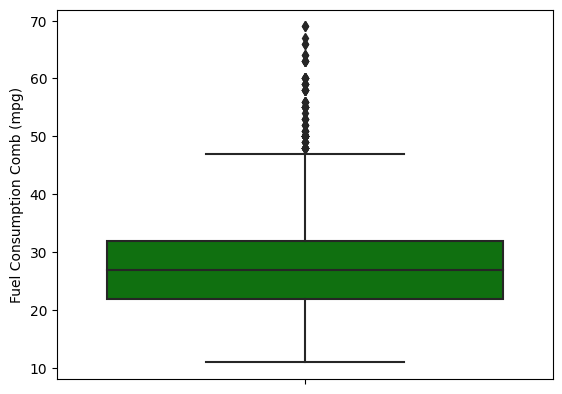

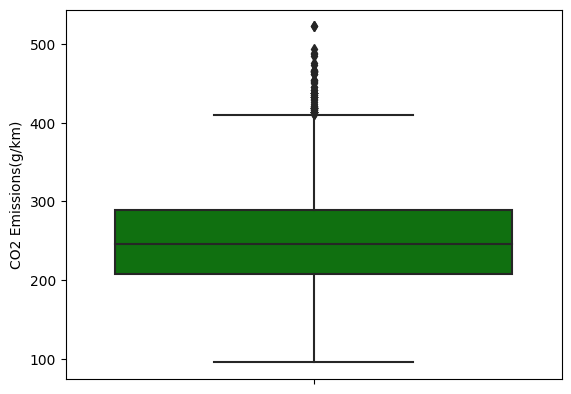

In [11]:
for i in df.columns:
    if df[i].dtypes != "object":
        sns.boxplot(y= df[i],color='green')
        plt.show()

##### Multivariate Analysis

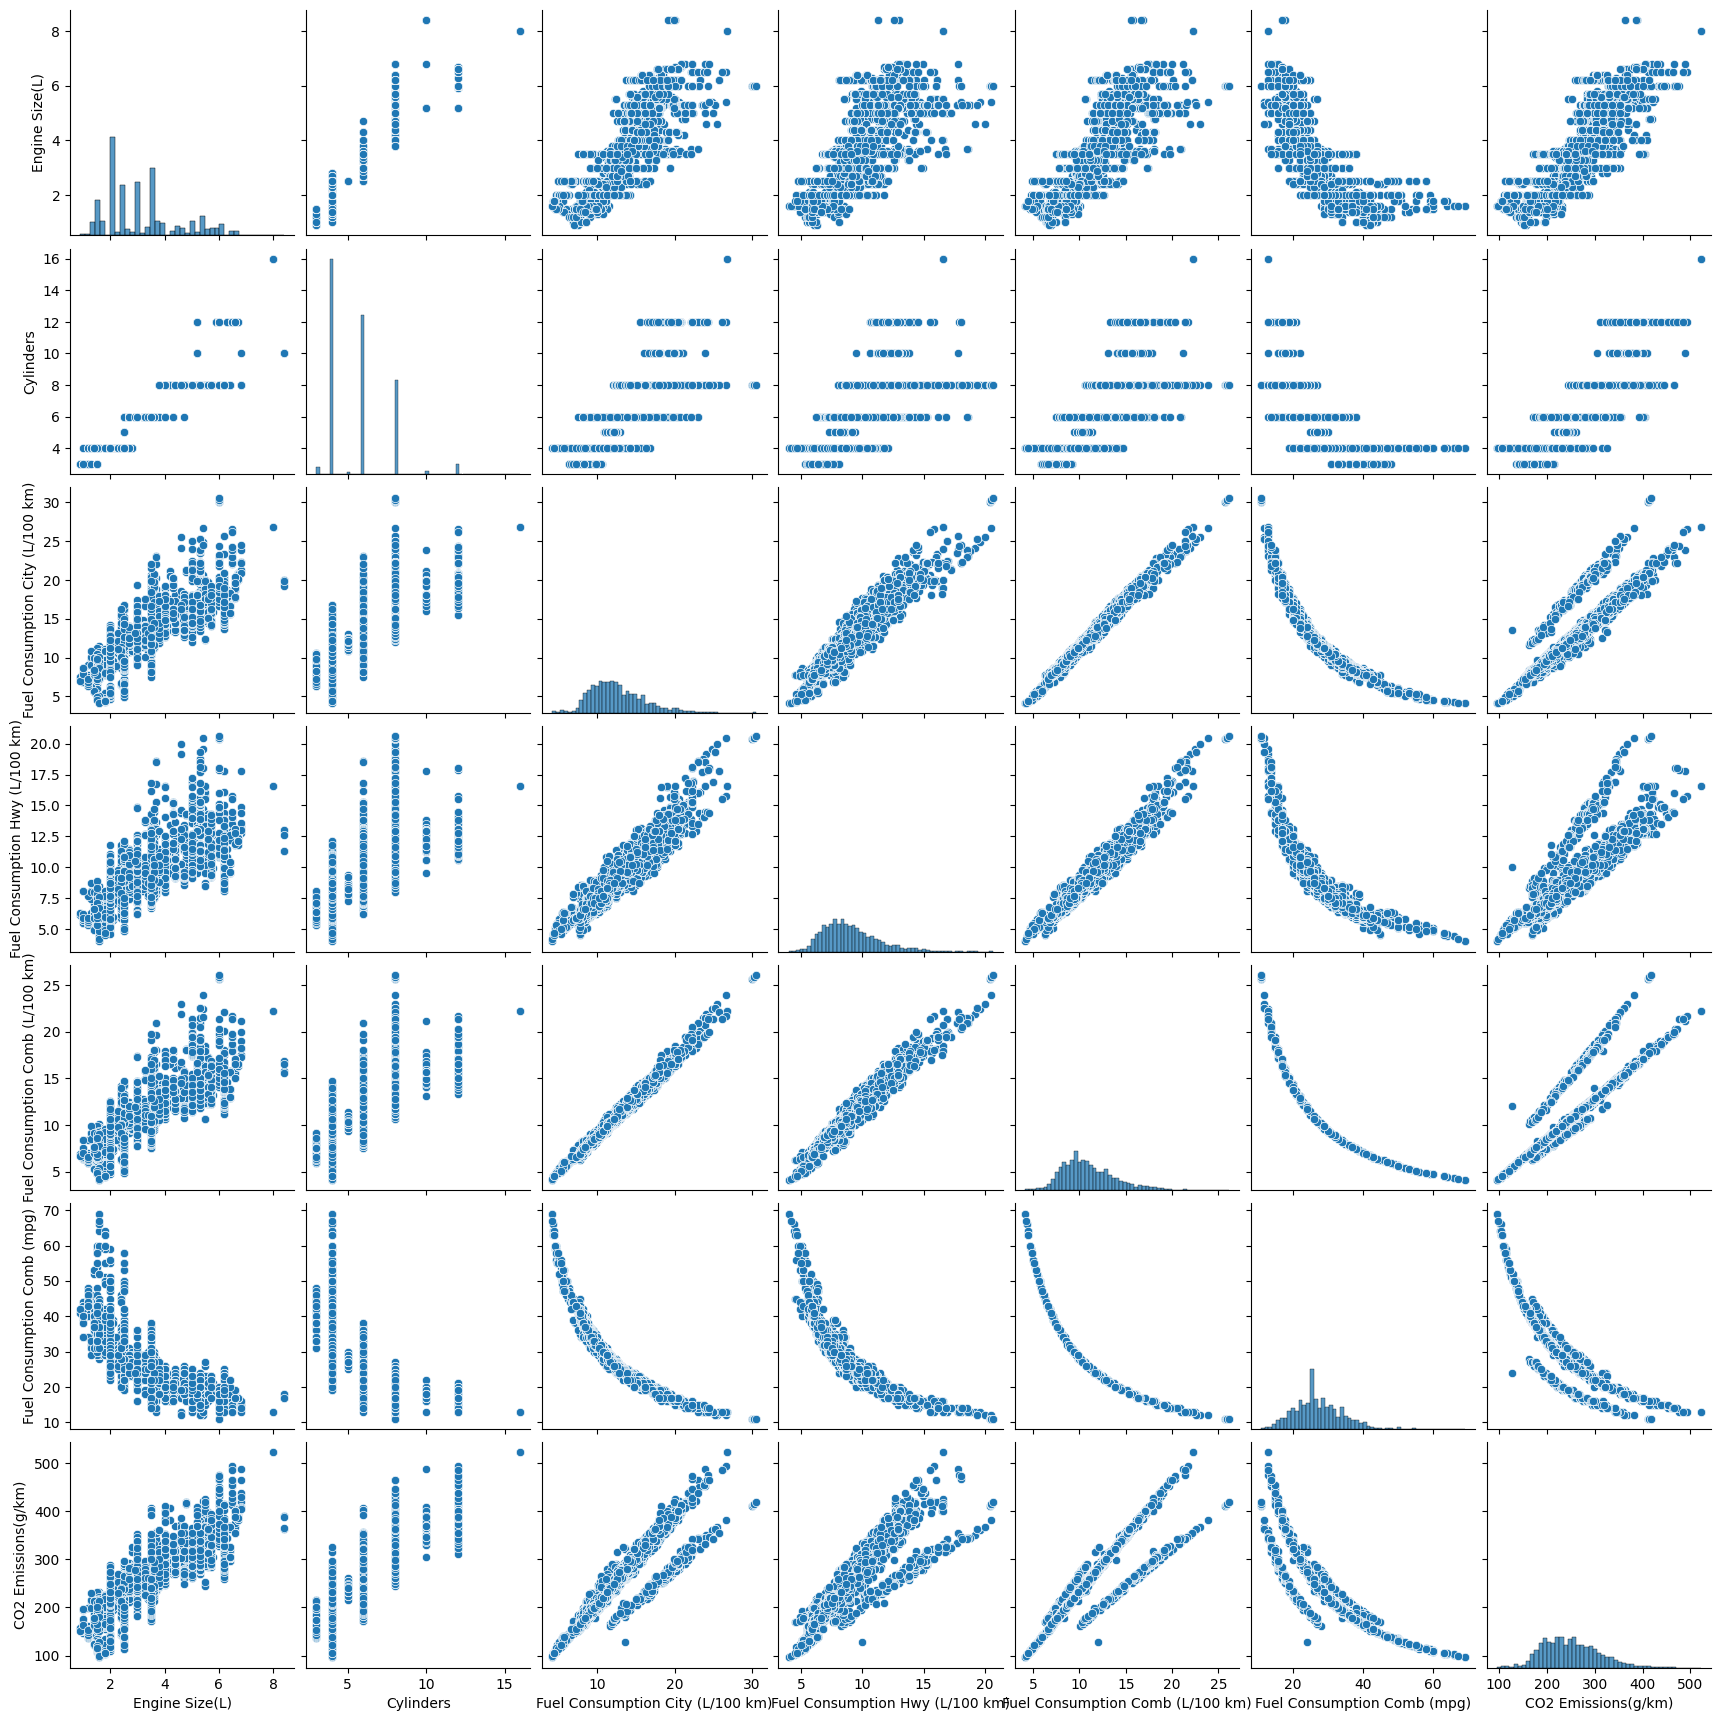

In [12]:
sns.pairplot(data=df);

In [13]:
df.rename(columns={'Fuel Type':'Fuel_Type'},inplace=True)

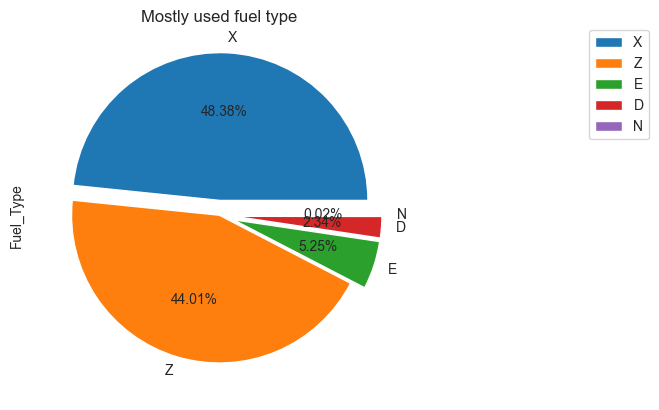

In [14]:
sns.set_style('ticks')
plt.title('Mostly used fuel type')
myexplode=[0.1,0,0.1,0.1,0.1]
df.Fuel_Type.value_counts().plot.pie(autopct='%0.2f%%',explode=myexplode);
plt.legend(bbox_to_anchor=(1.5,1), loc='upper left', borderaxespad=0);

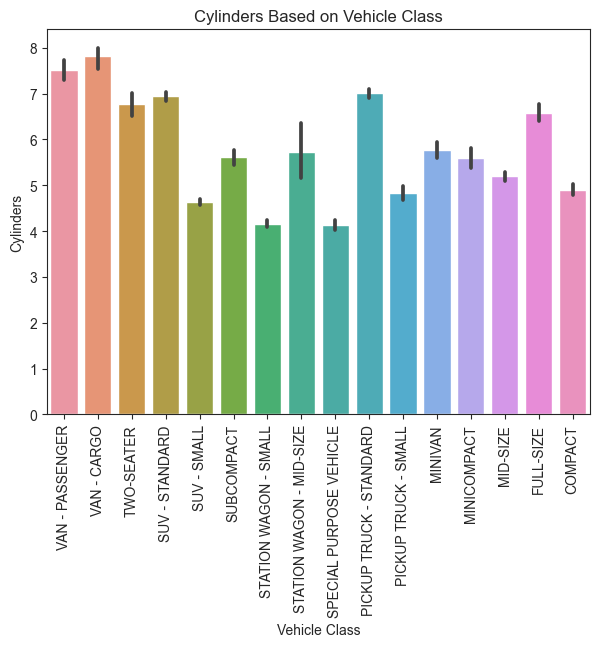

In [15]:
plt.figure(figsize=(7,5))
plt.title('Cylinders Based on Vehicle Class')
sns.barplot(x='Vehicle Class', y='Cylinders', data=df.sort_values(by='Vehicle Class', ascending=False))
plt.xticks(rotation=90);

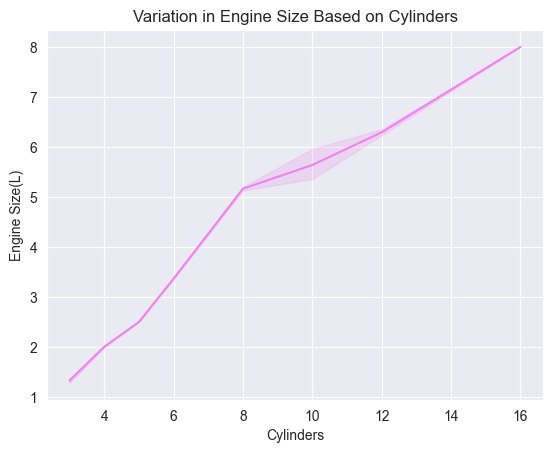

In [16]:
sns.set_style('darkgrid')
plt.title('Variation in Engine Size Based on Cylinders')
sns.lineplot(x='Cylinders', y='Engine Size(L)', data=df.sort_values(by='Cylinders'),color='violet');

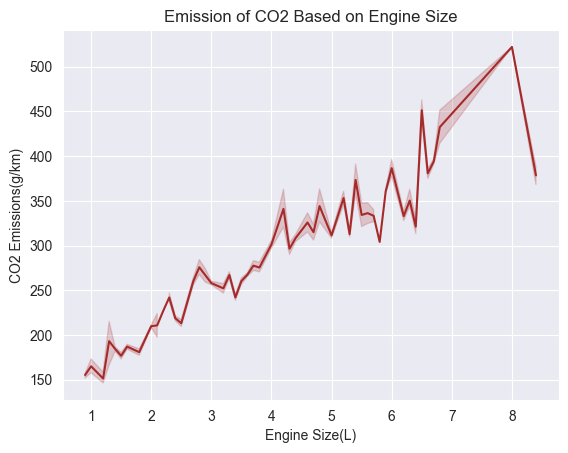

In [17]:
sns.set_style('darkgrid')
plt.title('Emission of CO2 Based on Engine Size')
sns.lineplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=df.sort_values(by='Engine Size(L)'),color='brown');

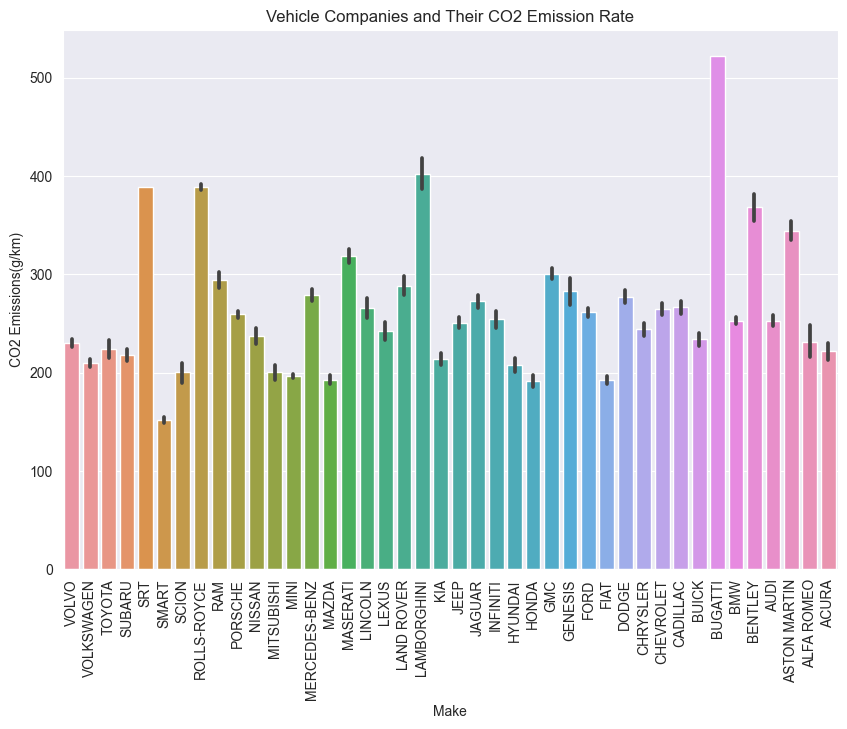

In [18]:
plt.figure(figsize=(10,7))
plt.title('Vehicle Companies and Their CO2 Emission Rate')
sns.barplot(x='Make', y='CO2 Emissions(g/km)', data=df.sort_values(by='Make', ascending=False))
plt.xticks(rotation=90);

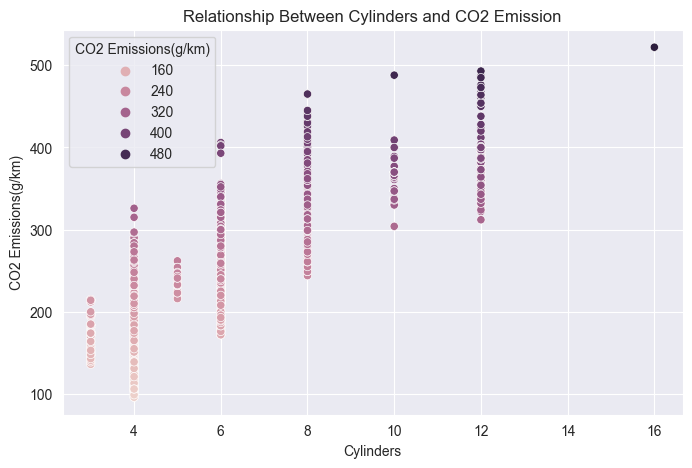

In [19]:
plt.figure(figsize=(8,5))
figure = sns.scatterplot(data=df, x='Cylinders', y='CO2 Emissions(g/km)', hue='CO2 Emissions(g/km)')
plt.title('Relationship Between Cylinders and CO2 Emission')
plt.show()

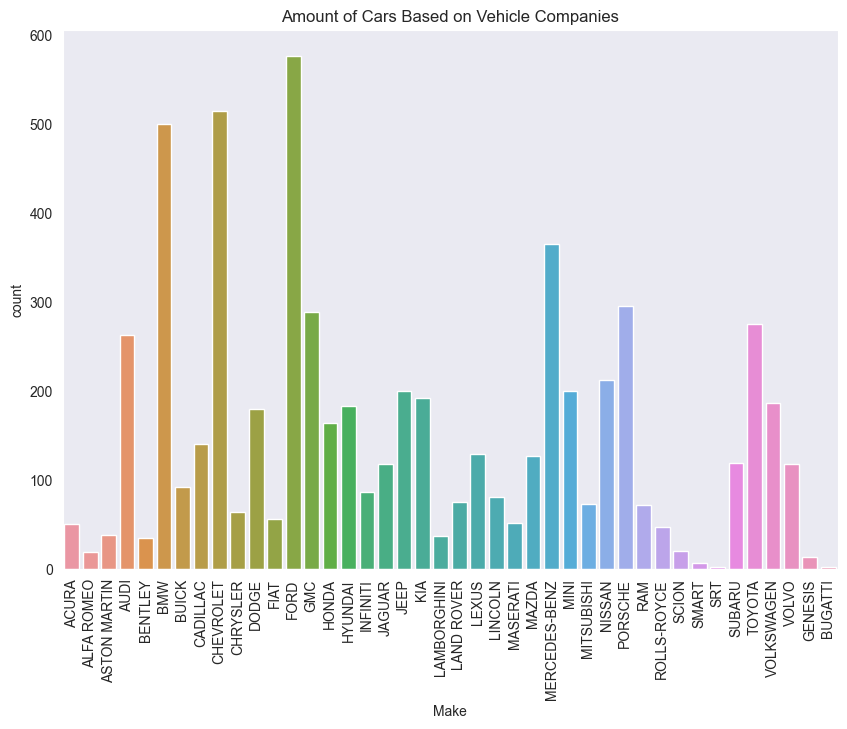

In [20]:
sns.set_style('dark')
plt.figure(figsize=(10,7))
plt.title('Amount of Cars Based on Vehicle Companies')
sns.countplot(x='Make', data=df)
plt.xticks(rotation=90);

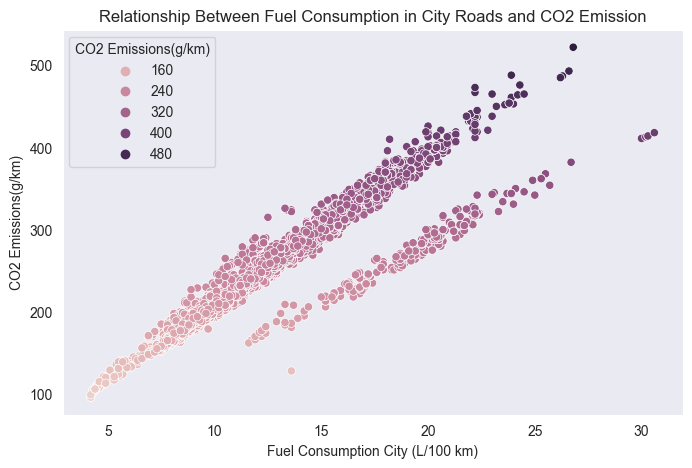

In [21]:
plt.figure(figsize=(8,5))
figure = sns.scatterplot(data=df, x='Fuel Consumption City (L/100 km)', y='CO2 Emissions(g/km)', hue='CO2 Emissions(g/km)')
plt.title('Relationship Between Fuel Consumption in City Roads and CO2 Emission')
plt.show()

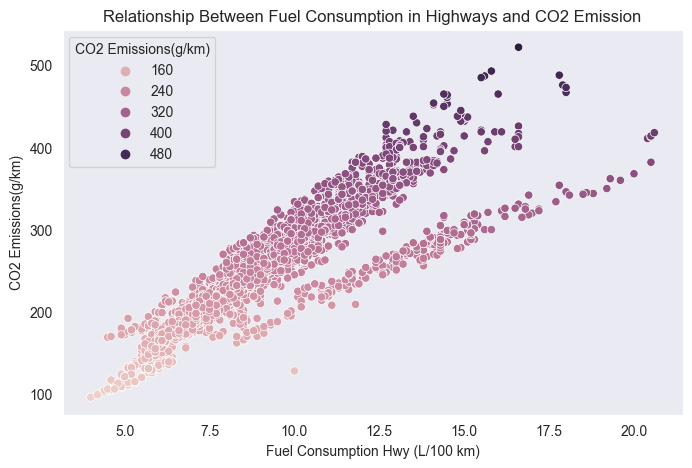

In [22]:
plt.figure(figsize=(8,5))
figure = sns.scatterplot(data=df, x='Fuel Consumption Hwy (L/100 km)', y='CO2 Emissions(g/km)', hue='CO2 Emissions(g/km)')
plt.title('Relationship Between Fuel Consumption in Highways and CO2 Emission')
plt.show()

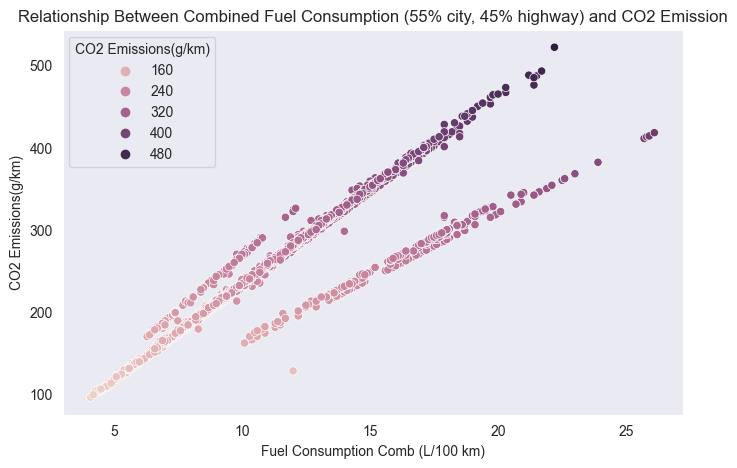

In [23]:
plt.figure(figsize=(8,5))
figure = sns.scatterplot(data=df, x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', hue='CO2 Emissions(g/km)')
plt.title('Relationship Between Combined Fuel Consumption (55% city, 45% highway) and CO2 Emission')
plt.show()

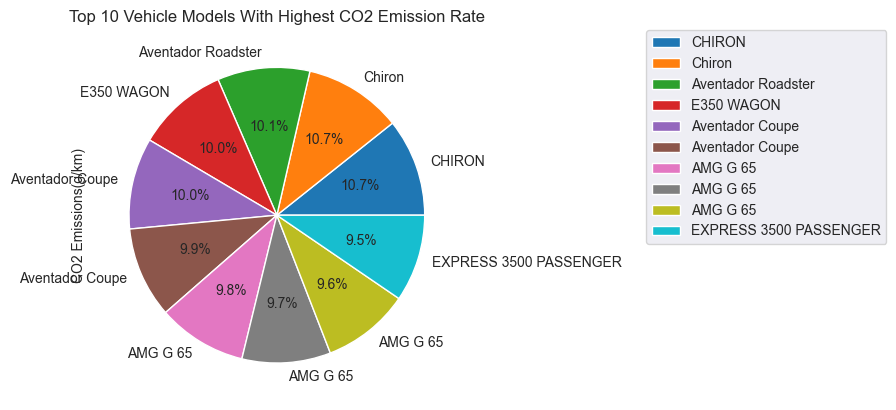

In [24]:
top_10 = df.nlargest(10, 'CO2 Emissions(g/km)')
top_10.plot.pie(y='CO2 Emissions(g/km)', labels=top_10['Model'], autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.5,1), loc='upper left', borderaxespad=0);
plt.title("Top 10 Vehicle Models With Highest CO2 Emission Rate")
plt.show()

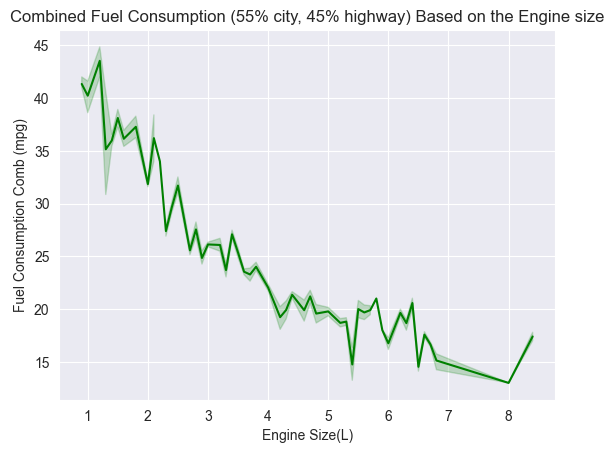

In [25]:
sns.set_style('darkgrid')
plt.title('Combined Fuel Consumption (55% city, 45% highway) Based on the Engine size')
sns.lineplot(x='Engine Size(L)', y='Fuel Consumption Comb (mpg)', data=df.sort_values(by='Engine Size(L)'),color='green');

##### Outlier Treatment

In [26]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [27]:
for column in df.columns:
    if df[column].dtype!='object':
        UL,LL=outlier_limit(df[column])
        df[column]=np.where((df[column]>UL)|(df[column]<LL),np.nan,df[column])

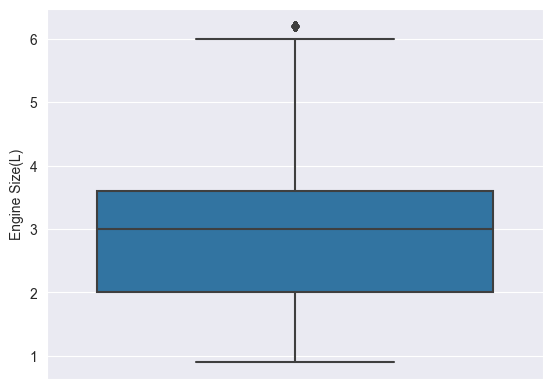

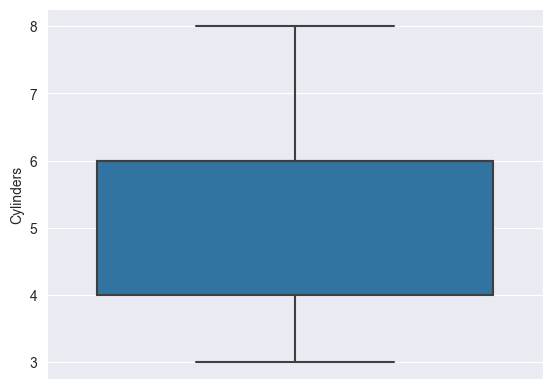

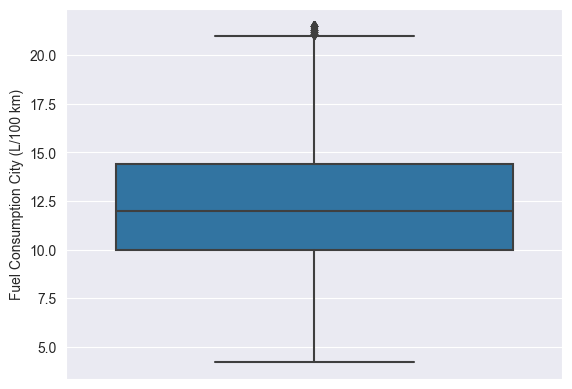

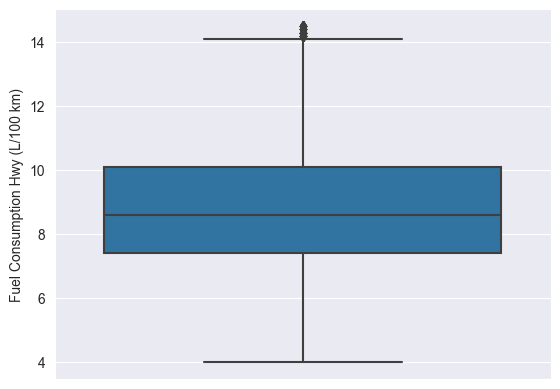

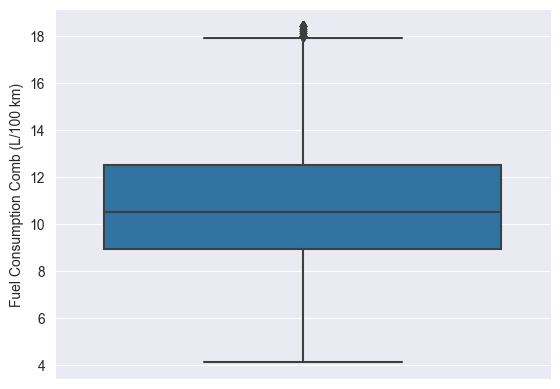

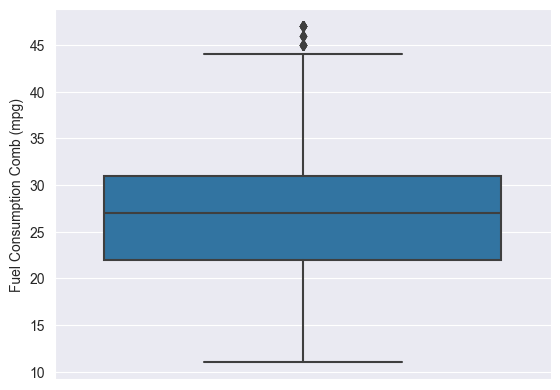

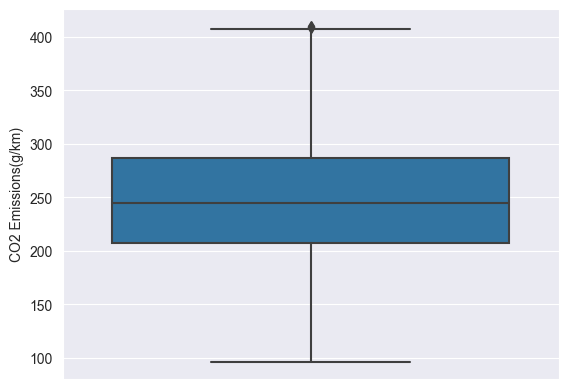

In [28]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i])
        plt.figure
        plt.show()

In [29]:
df.dropna(inplace=True)

##### Label Encoding the Categorical Columns

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5816 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              5816 non-null   object 
 1   Model                             5816 non-null   object 
 2   Vehicle Class                     5816 non-null   object 
 3   Engine Size(L)                    5816 non-null   float64
 4   Cylinders                         5816 non-null   float64
 5   Transmission                      5816 non-null   object 
 6   Fuel_Type                         5816 non-null   object 
 7   Fuel Consumption City (L/100 km)  5816 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   5816 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  5816 non-null   float64
 10  Fuel Consumption Comb (mpg)       5816 non-null   float64
 11  CO2 Emissions(g/km)               5816 non-null   float64
dtypes: flo

In [31]:
le = LabelEncoder()

In [32]:
df['Make'] = le.fit_transform(df['Make'])
df['Model'] = le.fit_transform(df['Model'])
df['Vehicle Class'] = le.fit_transform(df['Vehicle Class'])
df['Vehicle Class'] = le.fit_transform(df['Vehicle Class'])
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Transmission'] = le.fit_transform(df['Transmission'])
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel_Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,974,0,2.0,4.0,14,4,9.9,6.7,8.5,33.0,196.0
1,0,974,0,2.4,4.0,25,4,11.2,7.7,9.6,29.0,221.0
3,0,1136,11,3.5,6.0,15,4,12.7,9.1,11.1,25.0,255.0
4,0,1372,11,3.5,6.0,15,4,12.1,8.7,10.6,27.0,244.0
5,0,1383,2,3.5,6.0,15,4,11.9,7.7,10.0,28.0,230.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,38,1801,11,2.0,4.0,17,4,10.7,7.7,9.4,30.0,219.0
7381,38,1807,11,2.0,4.0,17,4,11.2,8.3,9.9,29.0,232.0
7382,38,1810,11,2.0,4.0,17,4,11.7,8.6,10.3,27.0,240.0
7383,38,1818,12,2.0,4.0,17,4,11.2,8.3,9.9,29.0,232.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5816 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              5816 non-null   int32  
 1   Model                             5816 non-null   int32  
 2   Vehicle Class                     5816 non-null   int64  
 3   Engine Size(L)                    5816 non-null   float64
 4   Cylinders                         5816 non-null   float64
 5   Transmission                      5816 non-null   int32  
 6   Fuel_Type                         5816 non-null   int32  
 7   Fuel Consumption City (L/100 km)  5816 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   5816 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  5816 non-null   float64
 10  Fuel Consumption Comb (mpg)       5816 non-null   float64
 11  CO2 Emissions(g/km)               5816 non-null   float64
dtypes: flo

##### Checking the correlation with the target 'CO2 Emissions(g/km)'


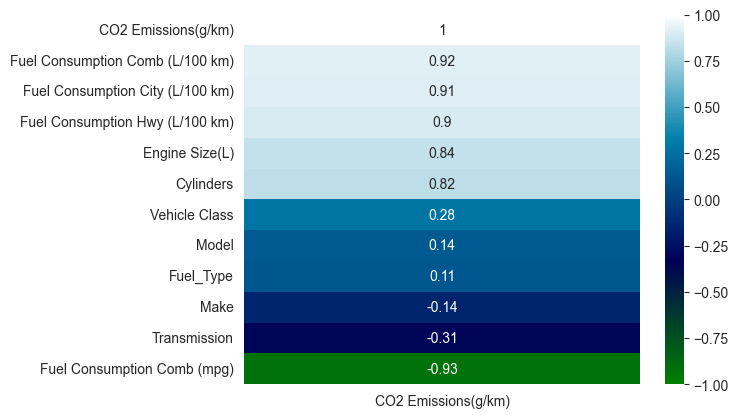

In [34]:
sns.heatmap(df.corr()[["CO2 Emissions(g/km)"]].sort_values(by="CO2 Emissions(g/km)", ascending=False), vmin=-1, vmax=1, annot=True,cmap="ocean");

##### Let's take only the columns with good correlation with the target

In [35]:
x = df[[ 'Fuel Consumption Hwy (L/100 km)','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Engine Size(L)','Cylinders']].values
y = df[['CO2 Emissions(g/km)']].values

##### Feature Scaling

In [36]:
sc = StandardScaler()

In [37]:
x = sc.fit_transform(x)

##### Cross Validation and Model Building

In [38]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [39]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  17.687656767003396
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  17.683892626908055
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  20.421729471127644
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  9.684088815733517
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  9.495255050330371
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  17.807986626423425
********************************************

##### We can see that "RandomForestRegressor" is having the best overall perfomance so far. We may proceed with it.

In [40]:
model = RandomForestRegressor()

##### Splitting the data into training and Testing

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [43]:
model.score(x_train,y_train)

0.9954942208812796

In [44]:
model.score(x_test,y_test)

0.979679296743461

In [45]:
y_pred = model.predict(x)

In [46]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"), dtype=float)

In [47]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,196.0,196.160000
1,221.0,223.050000
2,255.0,254.875651
3,244.0,244.166250
4,230.0,232.404167


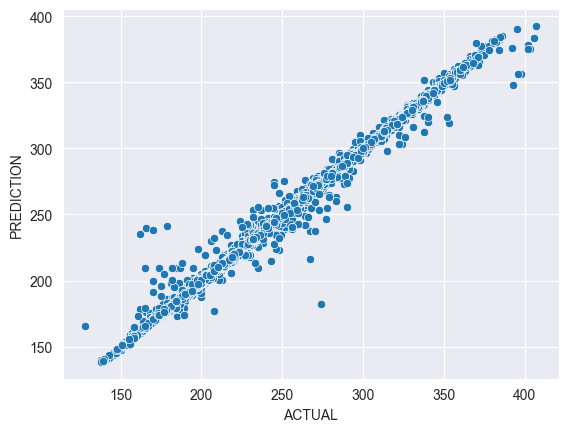

In [48]:
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION");